In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [21]:
# Load the dataset
dataset = pd.read_csv("/content/2_letter_recognition.data", header=None)

In [22]:
# Set feature matrix and labels
X = dataset.iloc[:, 1:17]  # columns 1 to 16 are features
Y = dataset.iloc[:, 0]     # column 0 is the label

In [25]:
# Encode the labels
le = LabelEncoder()
Y = le.fit_transform(Y)

In [27]:
# Split the dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=10)


In [28]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

In [34]:
# Define the Multi-layer Perceptron (MLP) neural network classifie
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),
                    activation='relu',
                    max_iter=500,
                    early_stopping=True,
                    random_state=10)

In [35]:
# Train the MLP classifier on the training data
mlp.fit(X_train, Y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100), max_iter=500,
              random_state=10)

In [36]:

# Predict on the validation set
predictions = mlp.predict(X_validation)
# Calculate and print the accuracy score of the classifier
print("Accuracy:", accuracy_score(Y_validation, predictions))


Accuracy: 0.95225


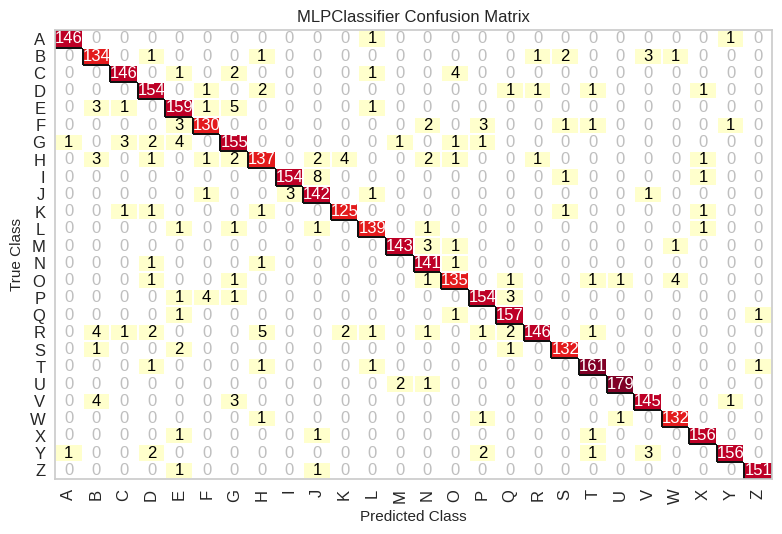

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
from yellowbrick.classifier import ConfusionMatrix

# Create visualizer
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# Fit visualizer
cm.fit(X_train, Y_train)

# Score on validation set
cm.score(X_validation, Y_validation)

# Show the confusion matrix
cm.show()
